In [1]:
# set up the python
import cosima_cookbook as cc
from dask.distributed import Client
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import numpy as np
import xarray as xr
import cmocean as cm
import cartopy.crs as ccrs
import cmocean as cm
import cartopy.feature as cft
import cftime
import IPython.display
import sys, os, warnings

In [2]:
# load the MOM6 data
db='/g/data/ik11/outputs/mom6-panan/panant.db' 
session=cc.database.create_session(db)
expts = ['panant-v2','panant-hycom1','panant-01-zstar']

In [3]:
client = Client()
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/37615/status,
Dashboard: /proxy/37615/status,Workers: 4
Total threads: 16,Total memory: 44.92 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:44557,Workers: 4
Dashboard: /proxy/37615/status,Total threads: 16
Started: Just now,Total memory: 44.92 GiB
Comm: tcp://10.0.128.132:42487,Total threads: 4
Dashboard: /proxy/41719/status,Memory: 11.23 GiB
Nanny: tcp://127.0.0.1:44011,


In [4]:
# get the depth
depth = cc.querying.getvar('panant-v2','deptho',session,n=1)
land_mask = np.squeeze(depth.values)*0
land_mask[np.isnan(land_mask)] = 1
land_mask = np.where(land_mask==1,land_mask,np.nan)

In [66]:
#1-year stream function
flux4 = cc.querying.getvar('panant-v2','umo_2d', session)

In [67]:
flux4 = flux4.isel(time=slice(-13,-1)) # slice to the same time range as MOM6
flux4_mean = flux4.mean('time').cumsum('yh')/1e9

In [68]:
t0 = flux4.time.item(0).strftime("%Y-%m-%d"),
t1 = flux4.time.item(-1).strftime("%Y-%m-%d"),

print([t0,t1])

[('1997-12-16',), ('1998-11-16',)]


ACCESS-OM2

In [6]:
session_2 = cc.database.create_session()

In [42]:
# dates to match the AVISO record
start_time = '1998-01-01'
end_time = '1998-12-31'

In [39]:
# 1 degstream function
expt_1 = '1deg_jra55v13_iaf_spinup1_B1' 
flux1 = cc.querying.getvar(expt_1,'tx_trans_int_z', session_2, start_time=start_time, end_time=end_time)
flux1 = flux1.sel(time=slice(start_time, end_time)) # slice to the same time range as MOM6
flux1_mean = flux1.mean('time').cumsum('yt_ocean')/1e9



In [10]:
# 0.25 deg stream function
expt_2 = '025deg_jra55_iaf_omip2_cycle1'  # 0.25-deg experiment
flux2 = cc.querying.getvar(expt_2,'tx_trans_int_z', session_2, start_time=start_time, end_time=end_time)
flux2 = flux2.sel(time=slice(start_time, end_time)) # slice to the same time range as MOM6
flux2_mean = flux2.mean('time').cumsum('yt_ocean')/1e9

In [11]:
# 0.1 deg stream function
expt_3 = '01deg_jra55v13_iaf'
flux3 = cc.querying.getvar(expt_3,'tx_trans_int_z', session_2, start_time=start_time, end_time=end_time)
flux3 = flux3.sel(time=slice(start_time, end_time)) # slice to the same time range as MOM6
flux3_mean = flux3.mean('time').cumsum('yt_ocean')/1e9

Text(0, 0.5, 'Streamfunction (Sv)')

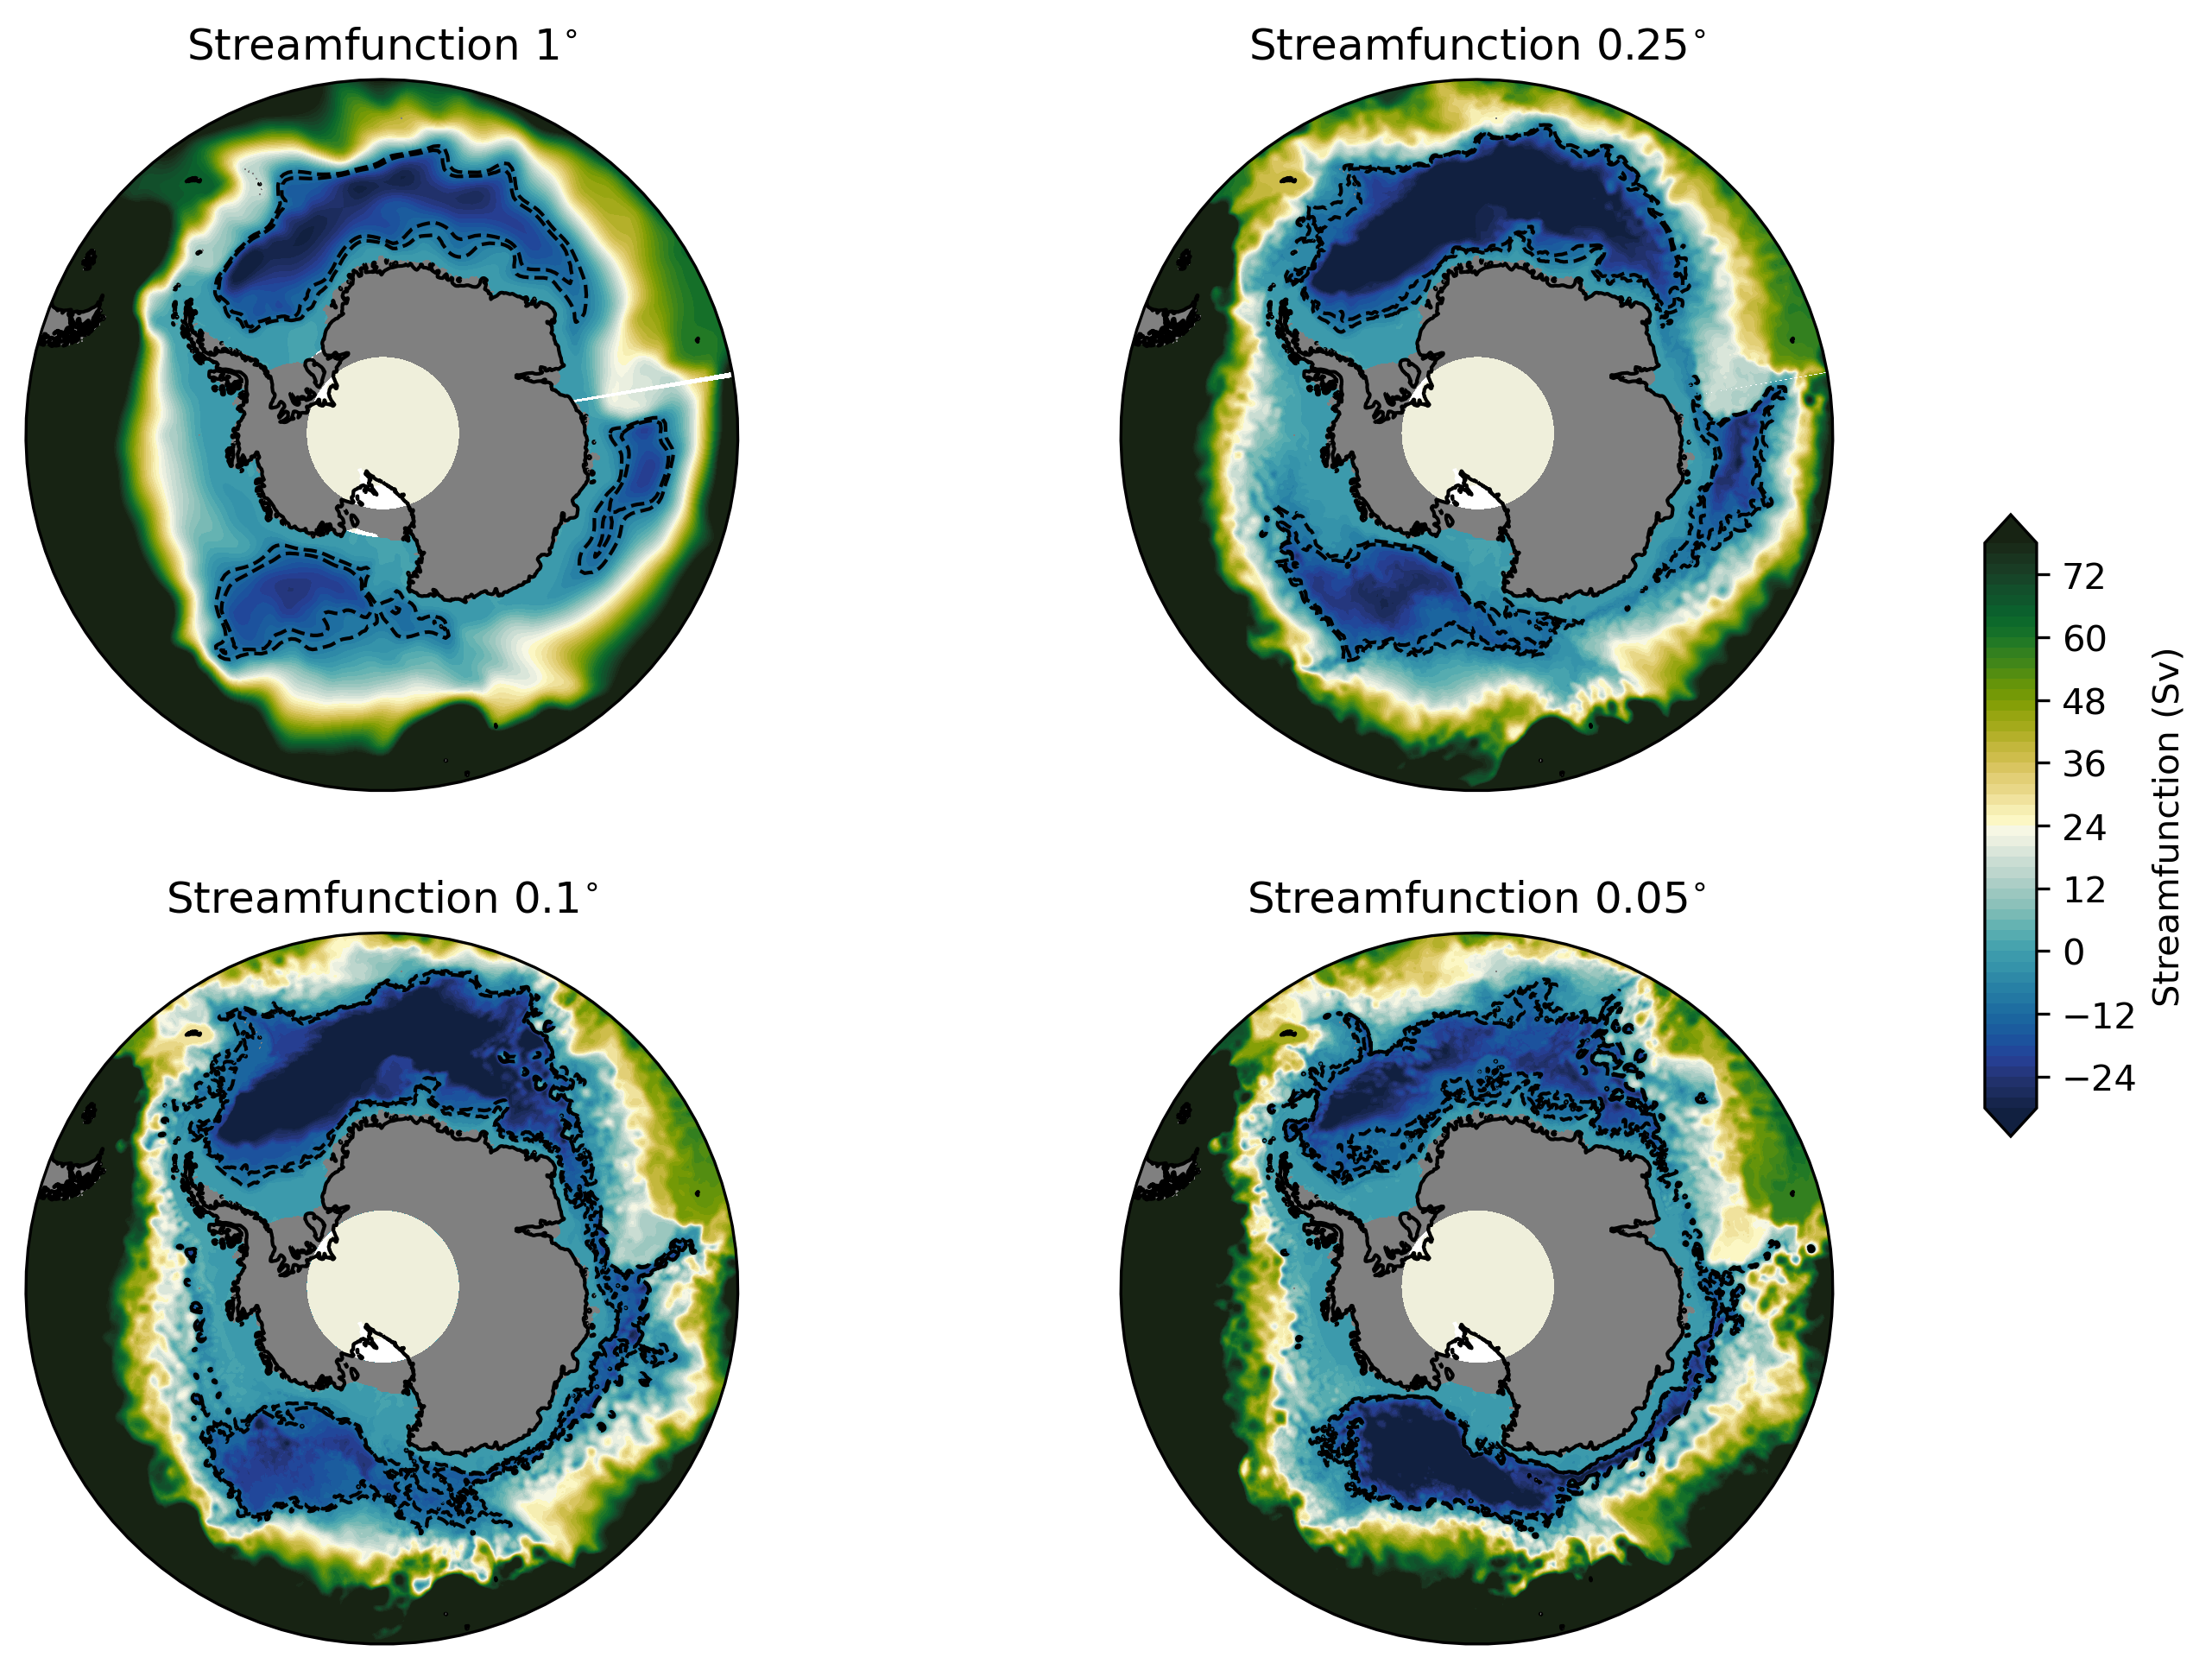

In [69]:
# 1 deg
projection=ccrs.SouthPolarStereo()
fig = plt.figure(figsize=(10, 8), dpi=300)
ax = plt.subplot(2, 2, 1, projection=projection)
ax.coastlines(resolution='50m')
ax.add_feature(cft.LAND)
ax.set_extent([-280, 80, -82, -50], crs=ccrs.PlateCarree())
ax.set_title('Streamfunction 1$^{\circ}$')

theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
p1 = flux1_mean.plot.contourf(ax=ax,levels=np.arange(-30,80,2),transform=ccrs.PlateCarree(),
                      cmap=cm.cm.delta,add_colorbar=False)
ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
flux1_mean.plot.contour(ax=ax,levels=[-12,-8],linewidths = 1,colors='k',transform=ccrs.PlateCarree())
ax.set_title('Streamfunction 1$^{\circ}$')

# 0.25 deg
ax = plt.subplot(2, 2, 2, projection=projection)
ax.coastlines(resolution='50m')
ax.add_feature(cft.LAND)
ax.set_extent([-280, 80, -82, -50], crs=ccrs.PlateCarree())
ax.set_title('Streamfunction 0.25$^{\circ}$')

theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
p1 = flux2_mean.plot.contourf(ax=ax,levels=np.arange(-30,80,2),transform=ccrs.PlateCarree(),
                      cmap=cm.cm.delta,add_colorbar=False)
ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
flux2_mean.plot.contour(ax=ax,levels=[-12,-8],linewidths = 1,colors='k',transform=ccrs.PlateCarree())
ax.set_title('Streamfunction 0.25$^{\circ}$')

#0.1 deg
ax = plt.subplot(2, 2, 3, projection=projection)
ax.coastlines(resolution='50m')
ax.add_feature(cft.LAND)
ax.set_extent([-280, 80, -82, -50], crs=ccrs.PlateCarree())
ax.set_title('Streamfunction 0.1$^{\circ}$')

theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
p1 = flux3_mean.plot.contourf(ax=ax,levels=np.arange(-30,80,2),transform=ccrs.PlateCarree(),
                      cmap=cm.cm.delta,add_colorbar=False)
ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
flux3_mean.plot.contour(ax=ax,levels=[-12,-8],linewidths = 1,colors='k',transform=ccrs.PlateCarree())
ax.set_title('Streamfunction 0.1$^{\circ}$')

# 0.05 deg
ax = plt.subplot(2, 2, 4, projection=projection)
ax.coastlines(resolution='50m')
ax.add_feature(cft.LAND)
ax.set_extent([-280, 80, -82, -50], crs=ccrs.PlateCarree())
ax.set_title('Streamfunction 0.05$^{\circ}$')

theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
p1 = flux4_mean.plot.contourf(ax=ax,levels=np.arange(-30,80,2),transform=ccrs.PlateCarree(),
                      cmap=cm.cm.delta,add_colorbar=False)
ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
flux4_mean.plot.contour(ax=ax,levels=[-12,-8],linewidths = 1,colors='k',transform=ccrs.PlateCarree())
ax.set_title('Streamfunction 0.05$^{\circ}$')
# add the colorbar
ax = plt.axes([0.92, 0.37, 0.02, 0.3])
cb = plt.colorbar(p1, cax=ax, orientation='vertical')
cb.ax.set_ylabel('Streamfunction (Sv)')